In [1]:
import numpy as np
import pandas as pd
from collections import Counter

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import TensorBoard
from keras.utils import to_categorical, plot_model

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [2]:
X_train = pd.read_csv("../Data/MNIST/train.csv")
y_train = X_train.label
X_train.drop(columns="label", inplace=True)
y_train = to_categorical(y_train.values)


test = pd.read_csv("../Data/MNIST/test.csv")

# Normalize to [0,1]
X_train /= 255
test /= 255

In [3]:
X_train.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
tb = TensorBoard(log_dir='ann_tb_log', write_images=True, write_grads=True)

In [5]:
num_classes = 10
epochs = 10

ann = Sequential()
ann.add(Dense(256, activation='relu'))
ann.add(Dropout(0.2))
ann.add(Dense(num_classes, activation='softmax'))
ann.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [6]:
ann.fit(X_train.values, y_train, callbacks=[tb], epochs=epochs)

Epoch 1/10
42000/42000 [==============================] - 4s 89us/step - loss: 0.2826 - acc: 0.9162
Epoch 2/10
42000/42000 [==============================] - 4s 86us/step - loss: 0.1278 - acc: 0.9625
Epoch 3/10
42000/42000 [==============================] - 4s 85us/step - loss: 0.0894 - acc: 0.9738
Epoch 4/10
42000/42000 [==============================] - 4s 86us/step - loss: 0.0708 - acc: 0.9779
Epoch 5/10
42000/42000 [==============================] - 4s 84us/step - loss: 0.0572 - acc: 0.9817
Epoch 6/10
42000/42000 [==============================] - 3s 82us/step - loss: 0.0457 - acc: 0.9852
Epoch 7/10
42000/42000 [==============================] - 4s 84us/step - loss: 0.0390 - acc: 0.9882
Epoch 8/10
42000/42000 [==============================] - 3s 83us/step - loss: 0.0343 - acc: 0.9892
Epoch 9/10
42000/42000 [==============================] - 3s 82us/step - loss: 0.0309 - acc: 0.9897
Epoch 10/10
42000/42000 [==============================] - 3s 82us/step - loss: 0.0273 - acc: 0.9910

In [7]:
ann.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [8]:
plot_model(ann, rankdir='LR', show_shapes=True)

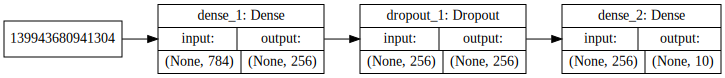

In [16]:
SVG(model_to_dot(ann, rankdir='LR', show_shapes=True).create(prog='dot', format='svg'))

In [15]:
pred = ann.predict(test.values)
pred = np.argmax(pred, axis=1)
pred

array([2, 0, 9, ..., 3, 9, 2])

In [17]:
Counter(pred)

Counter({0: 2760,
         1: 3268,
         2: 2797,
         3: 2738,
         4: 2751,
         5: 2542,
         6: 2745,
         7: 2912,
         8: 2718,
         9: 2769})

In [19]:
pred = pd.Series(pred, name='Label')
submit = pd.concat([pd.Series(range(1,28001),name = "ImageId"), pred], axis = 1)

In [20]:
submit.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [21]:
submit.to_csv("mlp1.csv", index=False)